## Лабораторная работа №5

1) Реализовать Генератор тестовых данных - 3 выборки (Линейное, Гауссовское и с двумя пиками)

2) Реализовать метод Панзена-Розенблатта(h, k)

3) Визуализовать восстановление плотности распределения

4) Для одиного из наборов данных оптимизировать ширину окна с помощью leave one out

5) Для сгенерированных данных с 2 и более горбами применить EM-алгоритм из SKLEARN метод окна и ядра

In [1]:
import math
import copy
import numpy as np
import random
import matplotlib
from matplotlib import pyplot as plt
from matplotlib import ticker as mtick

### 1) Реализация генераторов

Равномерное распределение (Можно использовать для остальных)

$F(x) = \frac{x - a}{b - a}$

In [17]:
#f*(b-a) = (x-a)
#f*(b-a) + a = x
def linear_distribution(a: float=0.0, b: float=1.0):
    '''
    Генератор линейного распределения на отрезке [a, b].
    Inputs:
        a: float - начало отрезка
        b: float - конец отрезка
    Output:
        float - случайное число из линейного распределения на данном отрезке
    '''
    return random.random() * (b - a) + a

def LinearData(n):
    return [ linear_distribution() for _ in range(n) ]

LinearData(10)

[0.5066346905445596,
 0.1608946777574609,
 0.48743241409443494,
 0.8624742976456947,
 0.47928139353429033,
 0.084253906264111,
 0.057893331146511184,
 0.05111311650423456,
 0.08666871350642458,
 0.8015522529937741]

Гауссовское (Нормальное) распределение

$F(x)=\frac{1}{2}(1 + erf \frac{x - \mu}{\sqrt{2 * \sigma^2}})$

In [19]:
# (12/n)**(1/2) (чтобы выровнять дисперсию) * (x - n/2 (чтобы выровнять мат ожидание)) 
def gaussian_distribution(m: float=0.0, d: float=1.0):
    '''
    Генератор чисел из Гауссовского распределения.
    Inputs:
        m - математичнское ожидание ожидание
        d - дисперсия распределения
    Output:
        float - случайное число из Гауссовского распределения.
    '''
    n = 12
    x = 0
    for i in range (n):
         x = x + random.random()
    return d * (12 / n) ** (1 / 2) * (x - n / 2) + m

def GaussianData(n):
    return [ gaussian_distribution() for _ in range(n) ]

GaussianData(10)

[-1.0913310463718267,
 -0.34753484596849216,
 0.4498566762607954,
 1.1427304281132145,
 0.8703515448640662,
 0.6860579642693141,
 0.7298850704168638,
 -1.0901520494627626,
 0.6868772589894148,
 1.7595508825714044]

Два Пика (2 нормальных распределения с разными параметрами)

In [21]:
def TwoPeaksData(N,m1=-4,d1=2,m2=3,d2=6):
    x = []
    for i in range(N):
        r = linear()
        if r > 0.5:
            x.append(gaussian_distribution(m1,d1))
        else:
            x.append(gaussian_distribution(m2,d2))
    return x

TwoPeaksData(10)

[-3.971797469152671,
 5.36615249784411,
 11.246054690145815,
 -1.7540559199833012,
 -6.298793248745673,
 -6.082665161977241,
 13.653673975295803,
 -2.9981626199651785,
 -8.722047090884901,
 4.085239239454912]

### 2) Реализация модели Парзена-Розенблатта

In [23]:
def gauss_kernel(r): # единственный рабочий без условий (с точностью 0.961)
     return ((2 * math.pi) ** (-1 / 2)) * np.exp(-1 / 2 * (r ** 2))
    
def ParzRozen(x, data, h):
    '''
    Эмпирическая Оценка Парзена-Розенблатта по окну ширины h
    '''
    rez = 0
    for i in data:
        rez = rez + gauss_kernel((x - i) / h)
    return rez / (len(data) * h)

### 3) Визуализация восстановления распределений

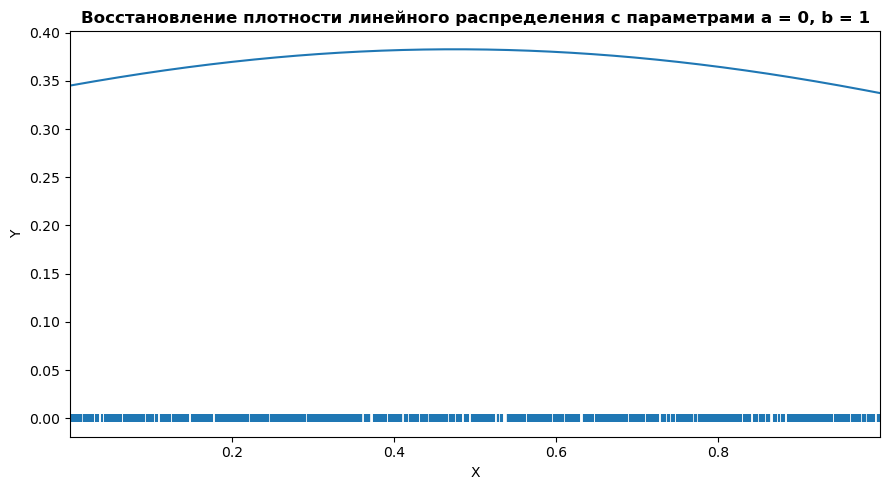

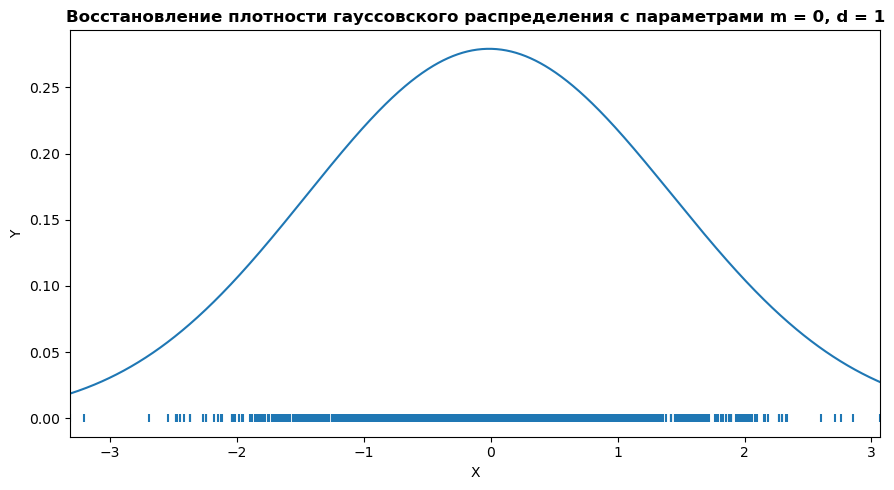

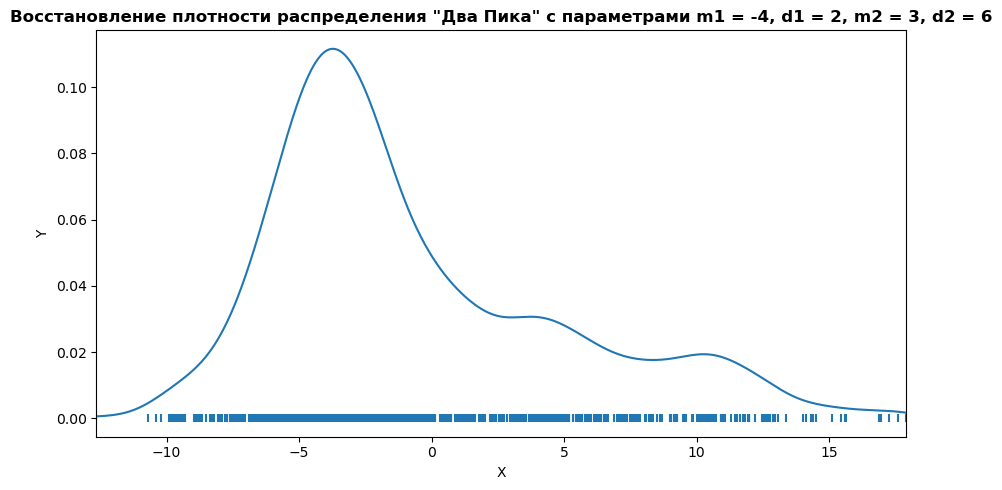

In [31]:
grid_points = 1000

# Изобразим график 1
lin_dat = LinearData(grid_points)
ld_min = min(lin_dat)
ld_max = max(lin_dat)
x = np.linspace(ld_min, ld_max, grid_points)

points = np.zeros((1000))

# Создадим график
fig, ax = plt.subplots(figsize=(9,5))
ax.plot(x, ParzRozen(x, lin_dat, h=1))
ax.scatter(lin_dat,points, marker = "|")

# Оформление
ax.set_xlim((ld_min, ld_max))
ax.set_title('Восстановление плотности линейного распределения с параметрами a = 0, b = 1', fontweight='bold')
ax.set_xlabel('X')
ax.set_ylabel('Y')
plt.tight_layout()

# Показ
plt.show()

# Изобразим график 2
gau_dat = GaussData(grid_points)
gau_min = min(gau_dat)
gau_max = max(gau_dat)
x = np.linspace(gau_min, gau_max, grid_points)

# Создадим график
fig, ax = plt.subplots(figsize=(9,5))
ax.plot(x, ParzRozen(x, gau_dat, h=1))
ax.scatter(gau_dat,points, marker = "|")


# Оформление
ax.set_xlim((gau_min, gau_max))
ax.set_title('Восстановление плотности гауссовского распределения с параметрами m = 0, d = 1', fontweight='bold')
ax.set_xlabel('X')
ax.set_ylabel('Y')
plt.tight_layout()

# Показ
plt.show()

# Изобразим график 3
tp_dat = TwoPeaksData(grid_points)
tp_min = min(tp_dat)
tp_max = max(tp_dat)
x = np.linspace(tp_min, tp_max, grid_points)

# Создадим график
fig, ax = plt.subplots(figsize=(9, 5))
ax.plot(x, ParzRozen(x, tp_dat, h=1))
ax.scatter(tp_dat,points, marker = "|")

# Оформление
ax.set_xlim((tp_min, tp_max))
ax.set_title('Восстановление плотности распределения "Два Пика" с параметрами m1 = -4, d1 = 2, m2 = 3, d2 = 6', fontweight='bold')
ax.set_xlabel('X')
ax.set_ylabel('Y')
plt.tight_layout()

# Показ
plt.show()

### 4) Оптимизация ширины окна одного из наборов данных методом Leave One Out

$LOO(h) = -\sum^l_{i=1}lnp_h(x_i;\frac{X^l}{x_i}) \to min$

In [26]:
#перебери циклом for наименьшее loo (от 0 до 10)
def LeaveOneOut(data,h):
    loo = 0
    for i in range(len(data)):
        loo = loo - math.log(ParzRozen(data[i],copy.copy(data[:i] + data[i+1:]),h=h))
    return loo

list = np.arange(0.5, 10.5, 0.5)
loo_min = 100000
h_min = 11
for h in list:
    if LeaveOneOut(tp_dat,h) < loo_min:
        loo_min = LeaveOneOut(lin_dat,h)
        h_min = h

print(f"LOO при стартовом значении h=10: {LeaveOneOut(tp_dat,h)}")

LOO при стартовом значении h=10: 3483.5918241631252


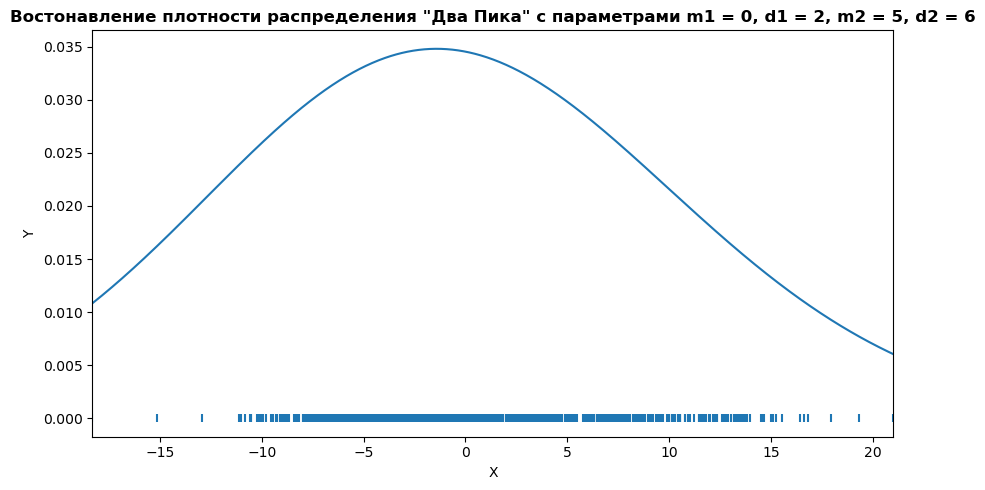

In [27]:
# Изобразим график 1
fig, ax = plt.subplots(figsize=(9,5))
ax.plot(x, ParzRozen(x, tp_dat, h=10))
points = np.zeros((1000))

ax.scatter(tp_dat,points, marker = "|")


# Оформление
ax.set_xlim((tp_min, tp_max))
ax.set_title('Востонавление плотности распределения "Два Пика" с параметрами m1 = 0, d1 = 2, m2 = 5, d2 = 6', fontweight='bold')
ax.set_xlabel('X')
ax.set_ylabel('Y')
plt.tight_layout()

# Показ
plt.show()

In [28]:
print(f"Оптимальный h по критерию LLO: {h_min}")
print(f"LOO при оптимальном значении: {loo_min}")

Оптимальный h по критерию LLO: 0.5
LOO при оптимальном значении: 513.3568178654002


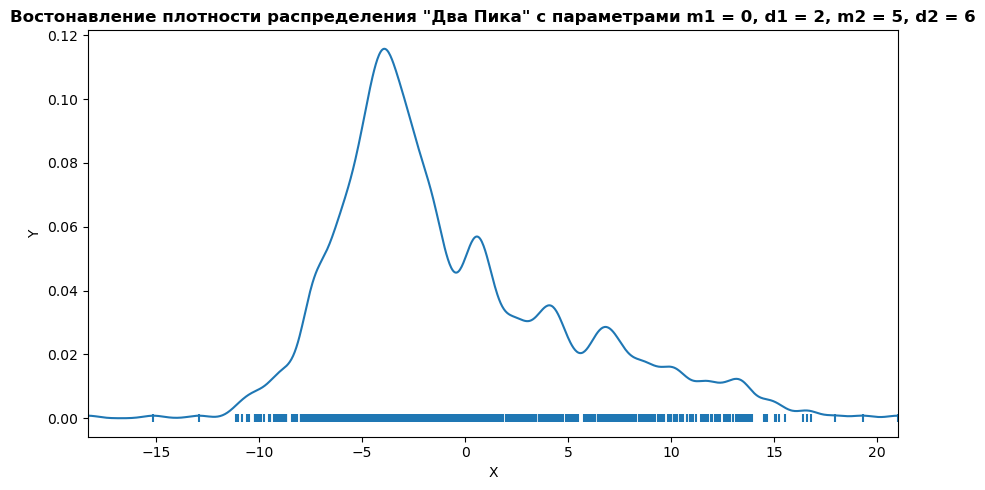

In [29]:
# Изобразим график 1
fig, ax = plt.subplots(figsize=(9,5))
ax.plot(x, ParzRozen(x, tp_dat, h=h_min))
points = np.zeros((1000))

ax.scatter(tp_dat,points, marker = "|")

# Оформление
ax.set_xlim((tp_min, tp_max))
ax.set_title('Востонавление плотности распределения "Два Пика" с параметрами m1 = 0, d1 = 2, m2 = 5, d2 = 6', fontweight='bold')
ax.set_xlabel('X')
ax.set_ylabel('Y')
plt.tight_layout()

# Показ
plt.show()

### 5) Применить EM-алгоритм из SKLEARN метод окна и ядра для одного из наборов данных с двумя и более горбами

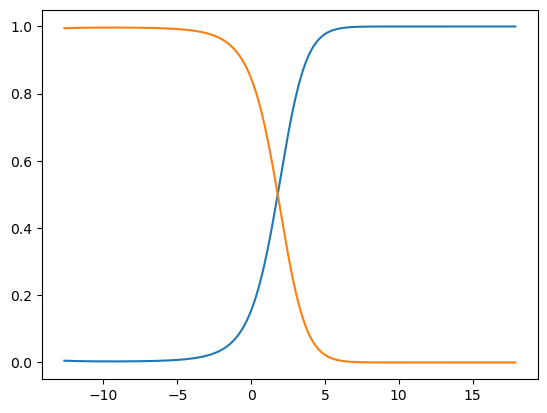

In [33]:
from sklearn.mixture import GaussianMixture
X = np.array(tp_dat).reshape(-1, 1)
gm = GaussianMixture(n_components=2, random_state=0).fit(X)
gm.means_
plt.plot(x, gm.predict_proba(np.array(x).reshape(-1, 1))[:,0],x, gm.predict_proba(np.array(x).reshape(-1, 1))[:,1])
plt.show()